<a href="https://colab.research.google.com/github/buildwithdemis/machinelearning/blob/main/ML_ch_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exercise: Fitting a Polynomial Curve**

**What is polynomial regression?**

Polynomial regression models relationships as a particular type of curve. Polynomials are a family of curves, ranging from simple to complex shapes. The more parameters in the equation (model), the more complex the curve can be.

**Advantages**

A major advantage of polynomial regression is that you can use it to look at all sorts of relationships. For example, you can use polynomial regression for relationships that are negative within a certain range of feature values, but positive within others. You can also use it where the label (y value) has no theoretical upper limit.

**Disadvantage**

The major disadvantage to polynomial curves is that they often extrapolate poorly. In other words, if we try to predict values that are larger or smaller than our training data, polynomials can predict unrealistically extreme values. Another disadvantage is that polynomial curves are easy to overfit. This means that noise in the data can change the shape of the curve much more than simpler models, such as simple linear regression.

In this exercise, we'll have a look at a different type of regression called polynomial regression. In contrast to linear regression ,which models relationships as straight lines, polynomial regression models relationships as curves.

Recall in our previous exercise how the relationship between core_temperature and protein_content_of_last_meal couldn't be properly explained using a straight line. In this exercise, we'll use polynomial regression to fit a curve to the data instead.

**Data visualization**

Let's start this exercise by loading and having a look at our data.

In [1]:
import pandas
!pip install statsmodels
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/doggy-illness.csv

#Import the data from the .csv file
dataset = pandas.read_csv('doggy-illness.csv', delimiter="\t")

#Let's have a look at the data
dataset

--2025-06-03 02:00:32--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21511 (21K) [text/plain]
Saving to: ‘graphing.py’

graphing.py         100%[===================>]  21.01K  --.-KB/s    in 0.002s  

2025-06-03 02:00:32 (13.3 MB/s) - ‘graphing.py’ saved [21511/21511]

--2025-06-03 02:00:32--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/doggy-illness.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, aw

,male,attended_training,age,body_fat_percentage,core_temperature,ate_at_tonys_steakhouse,needed_intensive_care,protein_content_of_last_meal
0,0,1,6.9,38,38.423169,0,0,7.66
1,0,1,5.4,32,39.015998,0,0,13.36
2,1,1,5.4,12,39.148341,0,0,12.90
3,1,0,4.8,23,39.060049,0,0,13.45
4,1,0,4.8,15,38.655439,0,0,10.53
...,...,...,...,...,...,...,...,...
93,0,0,4.5,38,37.939942,0,0,7.35
94,1,0,1.8,11,38.790426,1,1,12.18
95,0,0,6.6,20,39.489962,0,0,15.84
96,0,0,6.9,32,38.575742,1,1,9.79


**Simple Linear Regression**

Let's quickly jog our memory by performing the same simple linear regression as we did in the previous exercise, using the temperature and protein_content_of_last_meal columns of the dataset.

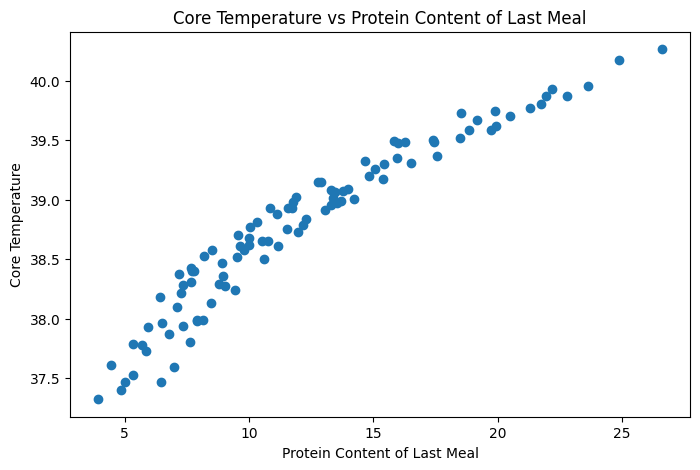

In [2]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Perform linear regression. This method takes care of
# the entire fitting procedure for us.
simple_formula = "core_temperature ~ protein_content_of_last_meal"
simple_model = smf.ols(formula = simple_formula, data = dataset).fit()

# Show a graph of the result
plt.figure(figsize=(8, 5))
plt.scatter(dataset["protein_content_of_last_meal"], dataset["core_temperature"])
plt.title("Core Temperature vs Protein Content of Last Meal")
plt.xlabel("Protein Content of Last Meal")
plt.ylabel("Core Temperature")
plt.show()

Notice how the relationship between the two variables is not truly linear. Looking at the plot, it's fairly clear to see that the points tend more heavily towards one side of the line, especially for the higher core-temperature and protein_content_of_last_meal values.

A straight line might not be the best way to describe this relationship.

Let's have a quick look at the model's R-Squared score:

In [3]:
print("R-squared:", simple_model.rsquared)

R-squared: 0.9155158150005704


That's quite a reasonable R-Squared score, but let's see if we can get an even better one!

**Simple Polynomial Regression**

Let's fit a simple polynomial regression this time. Similar to a simple linear regression, a simple polynomial regression models the relationship between a label and a single feature. Unlike a simple linear regression, a simple polynomial regression can explain relationships that aren't simply straight lines.

In our example, we're going to use a three-parameter polynomial.

<ipython-input-4-b6040e7c2ee8>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_vals = (polynomial_model.params[2] * x_vals**2 +
<ipython-input-4-b6040e7c2ee8>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  polynomial_model.params[1] * x_vals +
<ipython-input-4-b6040e7c2ee8>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  polynomial_model.params[0])


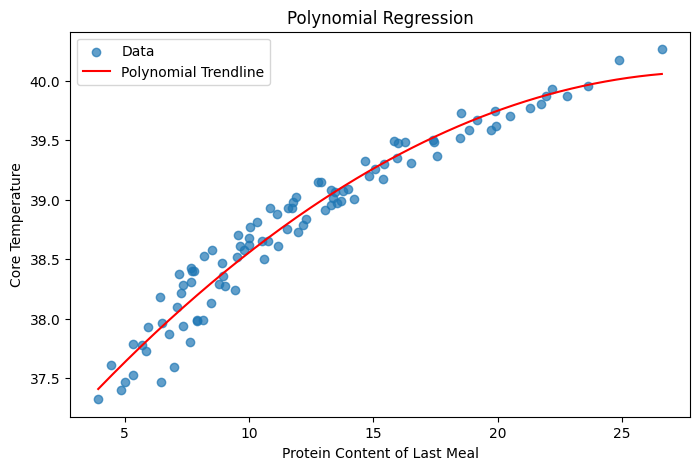

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Perform polynomial regression
polynomial_formula = "core_temperature ~ protein_content_of_last_meal + I(protein_content_of_last_meal**2)"
polynomial_model = smf.ols(formula=polynomial_formula, data=dataset).fit()

# Scatter plot of the data
plt.figure(figsize=(8, 5))
plt.scatter(dataset["protein_content_of_last_meal"], dataset["core_temperature"], label="Data", alpha=0.7)

# Generate smooth x values for the trendline
x_vals = np.linspace(dataset["protein_content_of_last_meal"].min(), dataset["protein_content_of_last_meal"].max(), 200)

# Calculate predicted y values using the polynomial coefficients
y_vals = (polynomial_model.params[2] * x_vals**2 +
          polynomial_model.params[1] * x_vals +
          polynomial_model.params[0])

# Plot the trendline
plt.plot(x_vals, y_vals, color="red", label="Polynomial Trendline")

# Label axes and show plot
plt.xlabel("Protein Content of Last Meal")
plt.ylabel("Core Temperature")
plt.title("Polynomial Regression")
plt.legend()
plt.show()

That looks a lot better already. Let's confirm by having a quick look at the R-Squared score:

In [5]:
print("R-squared:", polynomial_model.rsquared)

R-squared: 0.9514426069911688


That's a better R-Squared score than the one obtained from the previous model! We can now confidently tell our vet to prioritize dogs who ate a high-protein diet the night before.

Let's chart our model as a 3D chart. We'll view X and X
2
  as two separate parameters. Notice that our regression model is still a flat plane. This is why polynomial models are still considered to be linear models.

<ipython-input-6-202614e239f3>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  z_vals = (polynomial_model.params[0]
<ipython-input-6-202614e239f3>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  + polynomial_model.params[1] * x_grid
<ipython-input-6-202614e239f3>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  + polynomial_model.params[2] * x2_grid)


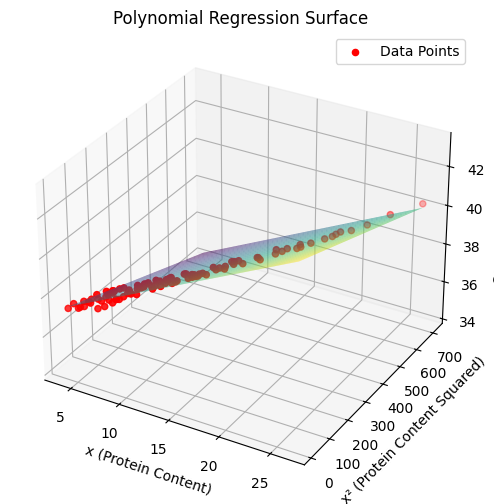

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a grid of x and x² values
x_vals = np.linspace(dataset.protein_content_of_last_meal.min(),
                     dataset.protein_content_of_last_meal.max(), 50)
x2_vals = x_vals**2
x_grid, x2_grid = np.meshgrid(x_vals, x2_vals)

# Compute z using the polynomial model's parameters
z_vals = (polynomial_model.params[0]
          + polynomial_model.params[1] * x_grid
          + polynomial_model.params[2] * x2_grid)

# Create the 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(x_grid, x2_grid, z_vals, alpha=0.6, cmap="viridis", edgecolor="none")

# Add the original data points
ax.scatter(dataset.protein_content_of_last_meal,
           dataset.protein_content_of_last_meal**2,
           dataset.core_temperature,
           color="red", label="Data Points")

# Axis labels and title
ax.set_xlabel("x (Protein Content)")
ax.set_ylabel("x² (Protein Content Squared)")
ax.set_zlabel("Core Temperature")
ax.set_title("Polynomial Regression Surface")

plt.legend()
plt.show()

**Extrapolating**

Let's see what happens if we extrapolate our data. We'd like to see if dogs that ate meals even higher in protein are expected to get even sicker.

Let's start with the linear regression. We can set what range we'd like to extrapolate our data over by using the x_range argument in the plotting function. Let's extrapolate over the range [0,100]:

<ipython-input-7-3f1c95558cbe>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_vals = simple_model.params[1] * x_vals + simple_model.params[0]


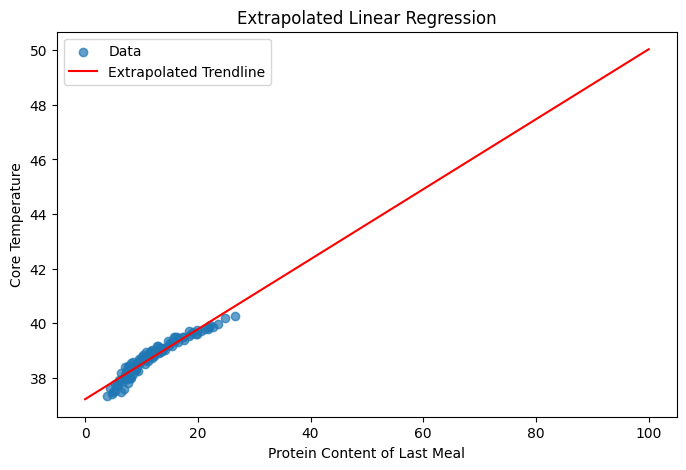

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot of the actual data
plt.figure(figsize=(8, 5))
plt.scatter(dataset["protein_content_of_last_meal"], dataset["core_temperature"], label="Data", alpha=0.7)

# Define extrapolation range
x_vals = np.linspace(0, 100, 200)

# Calculate the trendline using the simple linear model
y_vals = simple_model.params[1] * x_vals + simple_model.params[0]

# Plot the extrapolated trendline
plt.plot(x_vals, y_vals, color="red", label="Extrapolated Trendline")

# Label axes and add title/legend
plt.xlabel("Protein Content of Last Meal")
plt.ylabel("Core Temperature")
plt.title("Extrapolated Linear Regression")
plt.legend()
plt.show()

Next, we extrapolate the polynomial regression over the same range:

<ipython-input-8-3bea1e714ea6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_vals = (polynomial_model.params[2] * x_vals**2 +
<ipython-input-8-3bea1e714ea6>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  polynomial_model.params[1] * x_vals +
<ipython-input-8-3bea1e714ea6>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  polynomial_model.params[0])


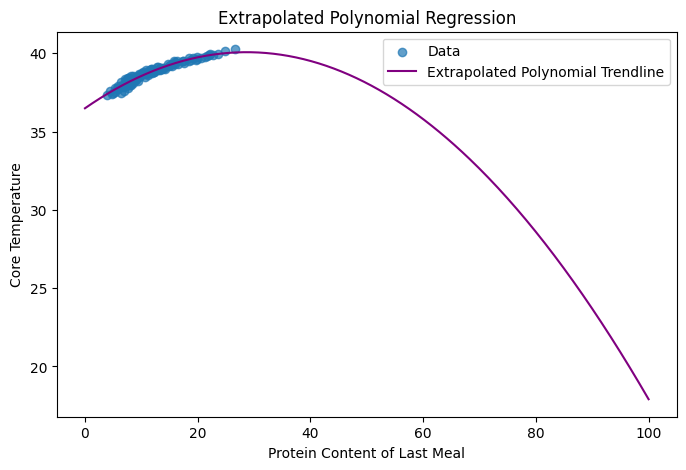

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot of the actual data
plt.figure(figsize=(8, 5))
plt.scatter(dataset["protein_content_of_last_meal"], dataset["core_temperature"], label="Data", alpha=0.7)

# Define extrapolation range
x_vals = np.linspace(0, 100, 300)

# Compute the polynomial trendline from the model parameters
y_vals = (polynomial_model.params[2] * x_vals**2 +
          polynomial_model.params[1] * x_vals +
          polynomial_model.params[0])

# Plot the extrapolated polynomial trendline
plt.plot(x_vals, y_vals, color="purple", label="Extrapolated Polynomial Trendline")

# Label axes and add title/legend
plt.xlabel("Protein Content of Last Meal")
plt.ylabel("Core Temperature")
plt.title("Extrapolated Polynomial Regression")
plt.legend()
plt.show()

These two graphs predict two very different things!

The extrapolated polynolmial regression expects core_temperature to go down, while the extrapolated linear regression expects linear expects core_temperature to go up.

A quick look at the graphs obtained in the previous exercise confirms that we should expect the core_temeprature to rise, not fall, as the protein_content_of_last_meal increases.

In general, it's not recommended to extrapolate from a polynomial regression unless you have an a-priori reason to do so (which is only very rarely the case, so it's best to err on the side of caution and never extrapolate from polynomial regressions).

**Summary**

We covered the following concepts in this exercise:



*   Built simple linear regression and simple polynomial regression models.
*   Compared the performance of both models by plotting them and looking at R-Squared values.
*   Extrapolated the models over a wider range of values.







